# Analysis on data aquired

<p>In this notebook we analyze the data parse from all source found in order to explain how during this COVID-19 epidemic the country around the world have performed testo to found infect.<br>
First of all we rerun our notebook to reimport all data with the update.
</p>

[Errno 2] No such file or directory: 'data'
/Users/andre/Desktop/University/Masters/Second year/Second semester/Data Science for business/Lezioni/4° Lezione - 1° Lab/datasciencebusiness/data


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


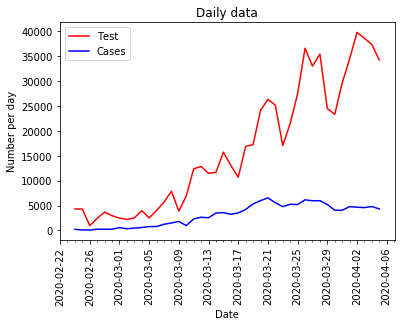

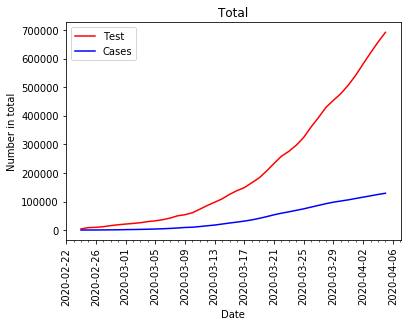

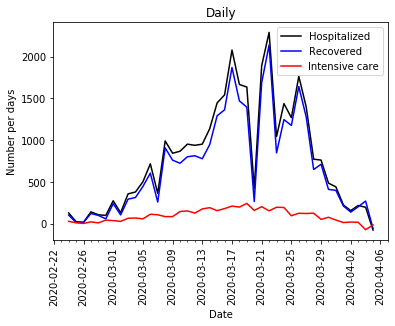

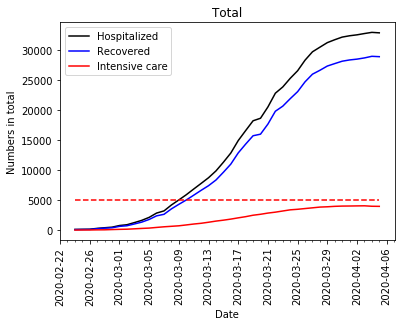

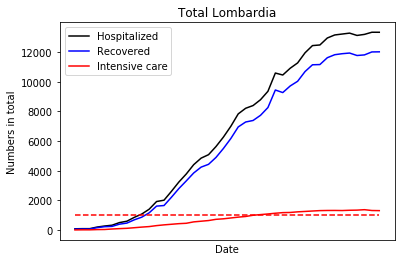

In [2]:
%cd data
%run italy_data.ipynb
%run usa_data.ipynb
%run uk_dìata.ipynb
%run brazil_data.ipynb
%run south_korea_data.ipynb
%run indonesia_data.ipynb
%run india_data.ipynb


UsageError: Line magic function `%dir` not found.
